## 결정 트리
- 트리 구조 :
   

### - 'alcohol', 'residual sugar', 'pH'을 기준으로 레드(0), 화이트 와인(1) 이진분류하기

In [7]:
import pandas as pd
red_wine = pd.read_csv('data/winequality-red.csv', sep=';')
white_wine = pd.read_csv('data/winequality-white.csv', sep=';')

red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
# 1. red_wine 필요 컬럼만 뽑기

red_wine = red_wine[['alcohol', 'residual sugar', 'pH']]
red_wine.rename(columns = {'residual sugar': 'sugar'}, inplace = True)
red_wine['class'] = 0

red_wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0
1,9.8,2.6,3.20,0
2,9.8,2.3,3.26,0
3,9.8,1.9,3.16,0
4,9.4,1.9,3.51,0


In [12]:
# white_wine 필요 컬럼만 뽑기 

white_wine = white_wine[['alcohol', 'residual sugar', 'pH']]
white_wine.rename(columns = {'residual sugar': 'sugar'}, inplace = True)
white_wine['class'] = 1

white_wine.head()

,alcohol,sugar,pH,class
0,8.8,20.7,3.00,1
1,9.5,1.6,3.30,1
2,10.1,6.9,3.26,1
3,9.9,8.5,3.19,1
4,9.9,8.5,3.19,1


In [15]:
# 2. 레드, 화이트 와인 데이터 프레임 합치기 : concat()

wine = pd.concat([red_wine, white_wine])
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 253.8 KB


In [17]:
# wine.describe()

In [18]:
# 3. 훈련, 채점용 만들기

data = wine[['alcohol', 'sugar', 'pH']]
target = wine[['class']]

In [19]:
# 4. 넣고 섞어주기 

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
train_test_split(data, target)

In [20]:
# 5. 컬럼들 정규화

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [21]:
# 6. 로지스틱 함수 (숫자 판단, 분류) ---------> 로지스틱 함수가 적절하지 않음.

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7770935960591133
0.792


C:\Users\1-17\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
# 1. 결정 트리 사용 ----> 로지스틱 회귀보다 직관적이고 설명하기 쉬움. (표준화 과정이 필요없음.)

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=10)               # max_depth : 트리의 깊이(depth)가 깊어질수록 결정트리는 과적합되기 쉬워 예측 성능이 저하
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9302134646962233
0.8732307692307693


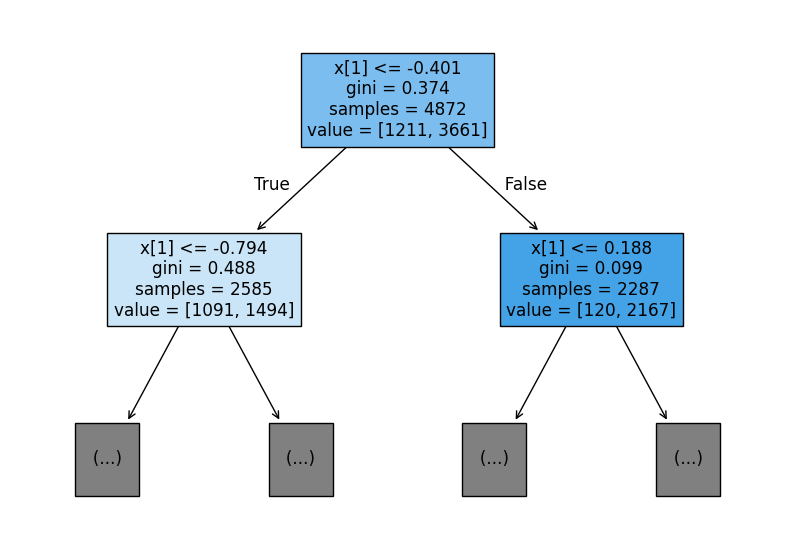

In [27]:
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree

plt.figure(figsize = (10,7))
plot_tree(dt, max_depth =1, filled = True)             # max_depth =1 : 앞부분에 있는 결정 트리만 보여줌.
plt.show()

### 지니 불순도 (gini)
- 순수노드 : 0에 가까움 -> 편향되게 데이터를 나눌 수록 잘 나눔
